In [1]:
from variable.variable import Variable
from activation_functions.relu import ReLUActivation
relu_fn = ReLUActivation()

In [2]:
x = Variable(3)
y = Variable(4)

In [3]:
z = x + y 

In [4]:
z.grad = 10

In [6]:
z.backward()

In [8]:
x, y

(Variable(data=3, grad=10, _op=None, name=None, requires_grad=True),
 Variable(data=4, grad=10, _op=None, name=None, requires_grad=True))

In [4]:
from loss_functions.cce import CategoricalCrossEntropy
from variable.variable import Variable

cce = CategoricalCrossEntropy()

prediction = Variable([[0.1, 0.2, 0.7], [0.7, 0.2, 0.1]], requires_grad=True)
target = Variable([[1, 0, 0], [0, 0, 1]], requires_grad=True)

loss = cce(prediction, target)
print(loss)
## Should be 2.3
loss.backward()
prediction


Loss: 2.3025850929940455


[[Variable(data=0.1, grad=-5.0, _op=None, name=None, requires_grad=True),
  Variable(data=0.2, grad=0.0, _op=None, name=None, requires_grad=True),
  Variable(data=0.7, grad=0.0, _op=None, name=None, requires_grad=True)],
 [Variable(data=0.7, grad=0.0, _op=None, name=None, requires_grad=True),
  Variable(data=0.2, grad=0.0, _op=None, name=None, requires_grad=True),
  Variable(data=0.1, grad=-5.0, _op=None, name=None, requires_grad=True)]]

In [5]:
prediction[0][0][0]._prev

set()

In [6]:
from models.simple_model import SimpleModel
input_size = 3
hidden_size = 10
output_size = 1


model = SimpleModel(input_size, hidden_size, output_size)

In [7]:
from optimizer.sgd import SGDOptimizer
from loss_functions.mse import MSELoss
from variable.variable import Variable
import random

loss_fn = MSELoss()

optimizer = SGDOptimizer(model.parameters(), learning_rate=0.0001)

losses = []
#let's feed random input and make the model always output 0

for i in range(100):
    x = [[Variable(random.randint(0, 10)) for i in range(input_size)]]
    y = [[Variable(0)]]
    output = model(x)
    loss = loss_fn(output, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss)
    losses.append(loss.loss)


Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0
Loss: 1.0


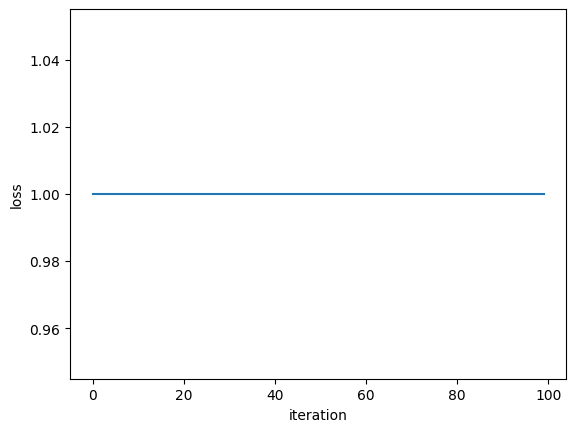

In [8]:
#plot the losses
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.show()



In [9]:
import torch
import torchvision

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset

# Transform the images to Tensors and normalize pixel values to [0, 1]
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])

# Download the entire MNIST dataset (but we'll only use a subset of it)
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Create a subset of the dataset, selecting only the first 10 samples
subset_indices = list(range(10))  # Use the first 10 samples
train_subset = Subset(trainset, subset_indices)

# Create a DataLoader for the subset
trainloader = torch.utils.data.DataLoader(train_subset, batch_size=1, shuffle=True)

# Example of iterating through the subset of the data
for images, labels in trainloader:
    print(f"Batch of images shape: {images.shape}")
    print(f"Batch of labels shape: {labels.shape}")
    break


Batch of images shape: torch.Size([1, 784])
Batch of labels shape: torch.Size([1])


In [2]:
from activation_functions.relu import ReLUActivation

relu_fn = ReLUActivation()

In [3]:
#lets takecare of formatting first 
        # images = Variable(images.tolist())


        # one_hot_labels = torch.zeros(64, 10)
        # one_hot_labels.scatter_(1, labels.view(-1, 1), 1)
        # labels = Variable(one_hot_labels.tolist())
        # optimizer.zero_grad()

#from that we know that we need to make the images a list of Variables and the labels a list of Variables

#lets takecare of formatting first
from variable.variable import Variable
input_images = []
labels_encoded = []

for images, labels in trainloader:
    input_images.append([Variable(images.tolist(), requires_grad=False)])
    one_hot_labels = torch.zeros(1, 10)
    one_hot_labels.scatter_(1, labels.view(-1, 1), 1)
    labels_encoded.append([Variable(one_hot_labels.tolist(), requires_grad=False)])



In [4]:
#lets iterate through the data and train the model
from models.simple_model import SimpleModel
from optimizer.sgd import SGDOptimizer
from loss_functions.cce import CategoricalCrossEntropy

model = SimpleModel(784, 128, 10)
loss_fn = CategoricalCrossEntropy()
optimizer = SGDOptimizer(model.parameters(), learning_rate=0.0001)

losses = []

for epoch in range(5):
    for images, labels in zip(input_images, labels_encoded):
        optimizer.zero_grad()
        output = model(images)
        loss = loss_fn(output, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.loss)
        print(loss)

Loss: 27.631021115928547
Loss: 27.631021115928547


In [9]:
len(images[0][0])

784

In [12]:
len(relu_fn(model.layer1(images))[0])

128

In [14]:
from normalization.softmax import Softmax
from variable.variable import Variable

In [15]:
softmax = Softmax()

In [16]:
softmax(output)

[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


[[Variable(data=0.0, grad=0, _op=<normalization.softmax.Softmax object at 0x000002100DB67A40>, name=None, requires_grad=True),
  Variable(data=0.0, grad=0, _op=<normalization.softmax.Softmax object at 0x000002100DB67A40>, name=None, requires_grad=True),
  Variable(data=0.0, grad=0, _op=<normalization.softmax.Softmax object at 0x000002100DB67A40>, name=None, requires_grad=True),
  Variable(data=0.0, grad=0, _op=<normalization.softmax.Softmax object at 0x000002100DB67A40>, name=None, requires_grad=True),
  Variable(data=1.0, grad=0, _op=<normalization.softmax.Softmax object at 0x000002100DB67A40>, name=None, requires_grad=True),
  Variable(data=0.0, grad=0, _op=<normalization.softmax.Softmax object at 0x000002100DB67A40>, name=None, requires_grad=True),
  Variable(data=0.0, grad=0, _op=<normalization.softmax.Softmax object at 0x000002100DB67A40>, name=None, requires_grad=True),
  Variable(data=0.0, grad=0, _op=<normalization.softmax.Softmax object at 0x000002100DB67A40>, name=None, requi

In [8]:
output[0][0]._prev

{Variable(data=7, grad=0, _op=None, name=None, requires_grad=False)}